# Week 5  - Quadratic Optimization

## Exercise 1 - Equality Constrained Quadratic Optimization

Consider the recycle system

<p align="center">
  <img src="img/w5-ex1-sys.png" width="800">

Described by the convex quadratic optimization problem:
\begin{array}{ll}
\min _u & \frac{1}{2} \sum_{i=1}^{n+1}\left(u_i-\bar{u}\right)^2 \\
\text { s.t. } & -u_1+u_n=-d_0 \\
& u_i-u_{i+1}=0 \\
& u_{n-1}-u_n-u_{n+1}=0
\end{array}

$\bar{u}$ and $d_0$ are parameters of the problem. The problem size can be adjusted selecting $n \geq 3$. Let $\bar{u}=0.2$ and $d_0=1$.

### 1.1 - Matrix Formulation

Express the problem in matrix form, i.e. in the form
\begin{align*}
\begin{array}{ll}
\min _{x \in \mathbb{R}^n} & \phi=\frac{1}{2} x^{T} H x+g^T x \\
\text { s.t. } & A^{T} x=b
\end{array}
\end{align*}

Let $n=10$. What is $x, H, g, A$, and $b$.

From the summation we have:
$$
\frac{1}{2}(\mu_i - \bar{\mu})^2 = \frac{1}{2} \left(\mu_i^2 + \bar{\mu}^2 - 2 \mu_i \bar{\mu} \right)
$$

inserting $\bar{\mu} = 0.2$ gives

$$
\begin{align}
\frac{1}{2} \left(\mu_i^2 + 0.2^2 - 2 \mu_i 0.2 \right) =
\frac{1}{2} \mu_i^2 + 0.02 - 0.2\mu_i
\end{align}
$$

The derivative is then:

$$
g_i = \mu_i - 0.2
$$

In [1]:
import numpy as np

n = 10
u_bar = 0.2
d0 = 1

H = np.eye(n+1) #n+1 x n+1 identity matrix

g = np.full(n+1, -u_bar)

#Create the A matrix
A = np.zeros((n+2, n+1))

# Setting the first constraint -u1 + u10 = -d0
A[0, 0] = -1   # for -u1
A[0, n-1] = 1  # for u10

# Setting the u_i - u_{i+1} = 0 constraints for i=1 to n-1
for i in range(1, n):
    A[i, i-1] = 1   # for u_i
    A[i, i] = -1    # for -u_{i+1}

# Last constraint: u_{9} - u_{10} - u_{11} = 0
A[n, n-2] = 1   # for u_{9}
A[n, n-1] = -1  # for -u_{10}
A[n, n] = -1    # for -u_{11}


b = np.array([
    [-d0],
    [0],
    [0]
])

### 1.2 - Lagrangian and KKT Optimiality Conditions

The Lagrangian is defined as:
$$
\mathcal{L}=\frac{1}{2} x^{T} H x+g^{T} x-\lambda^{T}(A x-b)
$$

And the first order optimality conditions are:
$$
\begin{align*}
\begin{aligned}
& H x+g-A \lambda=0 \\
& A^{\prime} x-b=0
\end{aligned}
\end{align*}
$$

#### Why are the optimality conditions both necessary and sufficient for this problem?
A quadratic objective function with a positive definite $H$ matrix (as the identity matrix $I$ in our problem) ensures that the objective function is convex. Convex optimization problems have the property that any local minimum is also a global minimum.

Furthermore, the linear constraints form a convex feasible set. When you combine a convex objective function with a convex feasible set, any point that satisfies the KKT conditions (which are the first-order conditions for optimality) not only is a local optimum but is also a global optimum. This is why satisfying the KKT conditions is sufficient for optimality for this problem.

### 1.3 - Make a function 
A function that constructs $H, g, A, \text{ and } b$ as function of $n, \bar{\mu}, \text{ and } d_0$

The function is implemented at `src/copti/quad/system/recycle.py:matrix_form`

### 1.4 - KKT-matrix Function
Implemented in `src/copti/quad/system/recycle.py:KKT_matrix`

### 1.5 - LU Solver
Implemented in `src/copti/quad/system/recycle.py:LU_solver`

### 1.6 - LDL Solver
Implemented in `src/copti/quad/system/recycle.py:LDL_solver`

### 1.7 - Null Space QR-factorization Solver
Implemented in `src/copti/quad/system/recycle.py:QR_Null_space_solver`

### 1.8 - Range Space Solver
Implemented in `src/copti/quad/system/recycle.py:range_space_solver`

### 1.9 - Solver Performance Evaluation
Evaluate the performance of the QP-solvers based on LU, LDL, Null-Space, and
Range-Space factorizations by plotting the `cputime` as function of `problem size`
(say in the range n=10-1000). Comment on the results.

In [2]:
import time
import numpy as np
import matplotlib.pyplot as plt
from copti.quad.system.recycle import LU_solver, LDL_solver, QR_null_space_solver, range_space_solver

u_bar = 0.2
d0 = 1
n = np.arange(10, 1000, 100)

# Log time for each solver
def time_solver(solver, n):
    times = []
    solutions = []
    for ni in n:
        start = time.process_time()
        solutions.append(solver(ni, u_bar, d0))
        end = time.process_time()
        times.append(end - start)
    return times, solutions

def solver_test(solver, n):
    solver_times, solver_solutions = time_solver(solver, n)
    print(f"Solver: {solver.__name__}")
    print(f"Times: {solver_times}")
    print(f"Solutions: {solver_solutions}")

    # Plot the results
    plt.plot(n, solver_times, label=solver.__name__)
    plt.xlabel('n')
    plt.ylabel('Time (s)')
    plt.show()

Solver: LU_solver
Times: [0.011489389999999933, 1.9460657929999998, 2.6896712040000006, 2.4237507150000006, 2.646843358, 2.616927928999999, 2.9030178729999996, 3.5931101159999983, 3.494860683999999, 3.814752843000001]
Solutions: [array([ 1.25000000e+00, -5.00000000e-01,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -5.00000000e-01,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -2.25179981e+15,
       -2.25179981e+15, -2.25179981e+15, -2.25179981e+15, -2.25179981e+15,
       -2.25179981e+15, -2.25179981e+15, -2.25179981e+15, -2.25179981e+15,
       -2.25179981e+15,  1.00000000e-01]), array([ 8.75000000e-01, -3.00000000e-01, -1.75000000e-01, -1.25000000e-01,
       -3.00000000e-01, -1.75000000e-01, -3.00000000e-01, -2.50000000e-01,
       -3.00000000e-01, -1.75000000e-01, -1.75000000e-01, -2.50000000e-01,
       -3.00000000e-01, -3.00000000e-01, -3.00000000e-01, -2.50000000e-01,
       -1.75000000e-01, -1.75000000e-01, -3.00000000

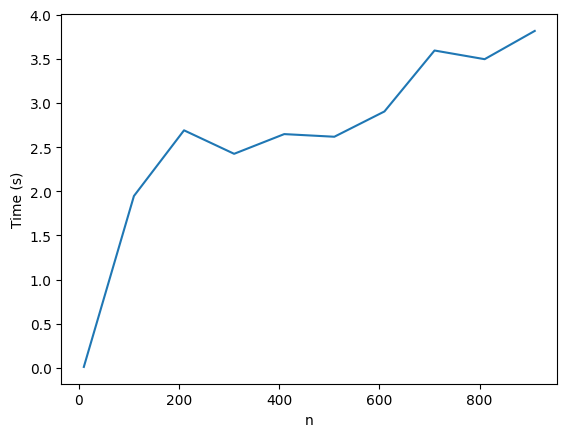

In [3]:
solver_test(LU_solver, n)

Solver: LDL_solver
Times: [0.020077534000002117, 1.0945755380000008, 1.189437568999999, 0.6393832490000051, 1.4570944750000052, 2.441020010999999, 2.26268417, 2.4741663980000013, 3.0479818299999977, 3.6924323109999975]
Solutions: [array([ 2.00000000e-01,  2.00000000e-01,  2.00000000e-01,  2.00000000e-01,
        2.00000000e-01,  2.00000000e-01,  2.00000000e-01,  2.00000000e-01,
        2.00000000e-01,  2.00000000e-01,  2.00000000e-01, -5.00000000e-01,
       -3.33333333e-01, -2.50000000e-01, -2.00000000e-01, -1.66666667e-01,
       -1.42857143e-01, -1.25000000e-01, -1.11111111e-01, -1.47368421e-01,
       -2.25179981e+15,  1.00000000e-01]), array([ 2.00000000e-01,  2.00000000e-01,  2.00000000e-01,  2.00000000e-01,
        2.00000000e-01,  2.00000000e-01,  2.00000000e-01,  2.00000000e-01,
        2.00000000e-01,  2.00000000e-01,  2.00000000e-01,  2.00000000e-01,
        2.00000000e-01,  2.00000000e-01,  2.00000000e-01,  2.00000000e-01,
        2.00000000e-01,  2.00000000e-01,  2.0000000

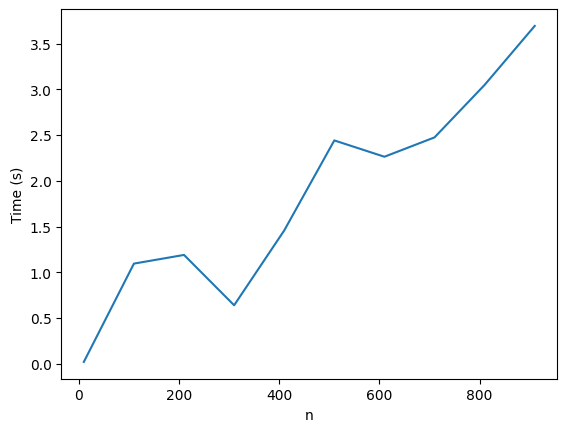

In [4]:
solver_test(LDL_solver, n)

Solver: QR_null_space_solver
Times: [0.01568734599999999, 0.7045044329999968, 0.28400770300000033, 0.6268496229999982, 2.083858795999994, 1.9156446749999958, 5.581556917999997, 4.488405960999998, 7.369520241999993, 10.612158668999996]
Solutions: [(array([[ 5.76720884e-01,  5.80197549e-01,  5.80893344e-01,
         5.81227585e-01,  5.81425312e-01,  5.81556245e-01,
         5.81649417e-01,  5.81719135e-01,  5.81773277e-01,
         5.94885278e-01,  6.33662436e-01],
       [ 4.56349396e-01,  4.60754264e-01,  4.61635823e-01,
         4.62059300e-01,  4.62309816e-01,  4.62475706e-01,
         4.62593753e-01,  4.62682084e-01,  4.62750681e-01,
         4.79363336e-01,  5.28493256e-01],
       [ 1.81456146e-01,  1.86467465e-01,  1.87470394e-01,
         1.87952174e-01,  1.88237182e-01,  1.88425910e-01,
         1.88560210e-01,  1.88660702e-01,  1.88738743e-01,
         2.07638585e-01,  2.63532585e-01],
       [-8.99448387e-02, -8.44816304e-02, -8.33882634e-02,
        -8.28630390e-02, -8.25523

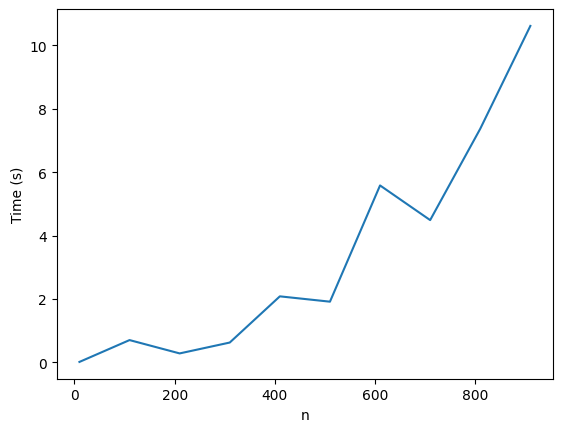

In [5]:
solver_test(QR_null_space_solver, n)

In [6]:
solver_test(range_space_solver, n)

LinAlgError: 10-th leading minor of the array is not positive definite